In [1]:
# loading the libraries.
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
spark = SparkSession.builder.appName('empoyee_attrition').getOrCreate()


In [2]:
# Reading the data
emp = spark.read.csv('aws-instance/Datasets/Employee-Attrition.csv',header=True,inferSchema=True)
emp.cache()

DataFrame[Age: int, Attrition: string, BusinessTravel: string, DailyRate: int, Department: string, DistanceFromHome: int, Education: int, EducationField: string, EmployeeCount: int, EmployeeNumber: int, EnvironmentSatisfaction: int, Gender: string, HourlyRate: int, JobInvolvement: int, JobLevel: int, JobRole: string, JobSatisfaction: int, MaritalStatus: string, MonthlyIncome: int, MonthlyRate: int, NumCompaniesWorked: int, Over18: string, OverTime: string, PercentSalaryHike: int, PerformanceRating: int, RelationshipSatisfaction: int, StandardHours: int, StockOptionLevel: int, TotalWorkingYears: int, TrainingTimesLastYear: int, WorkLifeBalance: int, YearsAtCompany: int, YearsInCurrentRole: int, YearsSinceLastPromotion: int, YearsWithCurrManager: int]

In [3]:
# data exploration
# df.show() doesn't show the data cleanly.
# Import pandas.
import pandas as pd

# Take the first five rows of data, and visualise.
pd.DataFrame(emp.take(5), columns=emp.columns)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# visualising the schema at a high level data structure
emp.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [5]:
# checking missing values (count), mean, stddev
emp.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Age,1470,36.923809523809524,9.135373489136729,18,60
Attrition,1470,None,None,No,Yes
BusinessTravel,1470,None,None,Non-Travel,Travel_Rarely
DailyRate,1470,802.4857142857143,403.50909994352804,102,1499
Department,1470,None,None,Human Resources,Sales
DistanceFromHome,1470,9.19251700680272,8.10686443566608,1,29
Education,1470,2.912925170068027,1.0241649445978718,1,5
EducationField,1470,None,None,Human Resources,Technical Degree
EmployeeCount,1470,1.0,0.0,1,1


In [6]:
# We can use group by and count to find out how many data points we have for each class in our predictor.

emp.groupby('Attrition').count().toPandas()

,Attrition,count
0,No,1233
1,Yes,237


In [7]:
# List of problems: Resolve these problems
# Problmes found on comparing printschema and df.describe, using groupby
# 1. we can see some values none and comparing with the print schema we found that they are string values which need to be converted into integer
# 2. it is good we have no missing values. 
pdEmp = emp.toPandas()


In [8]:
# to know the rows and the column in dataset.
pdEmp.shape

(1470, 35)

In [9]:
# Reordering the dataset moving the targert variable "Attrition" to end.
#emp.head()
#emp.head()
X = pdEmp.pop('Attrition')
pdEmp['Attrition'] = X
pdEmp.head()



,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [10]:
# So, we have two main task 
# As we see in the data.head() below columns contains the same value and doesnot provide meaning to data.
# removing the columns which contains same values (“EmployeeCount”, “EmployeeNumber”, “Over18”, “StandardHours”) and are not useful.
pdEmp = pdEmp.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
pdEmp.columns


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [11]:
pdEmp.shape

(1470, 31)

In [12]:
# Handling categorical variables.
# since we have only two unique values we can convert them to 0,1
pdEmp["Attrition"].unique()
pdEmp['Attrition'].value_counts()
pdEmp.loc[pdEmp['Attrition']=='No', 'Attrition'] = 0
pdEmp.loc[pdEmp['Attrition']=='Yes', 'Attrition'] = 1

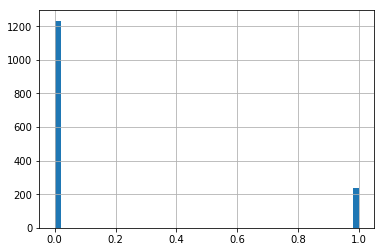

In [13]:
%matplotlib inline
pdEmp['Attrition'].hist(bins=50)

In [14]:
# checking other categorical variable
# we can see there are only 3 unique values exists variable
# convert categorical variables(“Gender”, “BusinessTravel”, “Department”, “EducationField”, “JobRole”, “MaritalStatus”, “OverTime”) to numerical
# catgorising the business travel by employee
pdEmp['BusinessTravel'].unique()
pdEmp['pdEmpb_Travel_Rarely']=0
pdEmp['pdEmpb_Travel_Frequently']=0
pdEmp['pdEmpb_Non-Travel']=0

pdEmp.loc[pdEmp['BusinessTravel']=='Travel_Rarely','pdEmpb_Travel_Rarely'] = 1
pdEmp.loc[pdEmp['BusinessTravel']=='Travel_Frequently','pdEmpb_Travel_Frequently'] = 1
pdEmp.loc[pdEmp['BusinessTravel']=='Non-Travel','pdEmpb_Non-Travel'] = 1

# converting the education field and categorising.
pdEmp['Life_Sciences']=0
pdEmp['Medical']=0
pdEmp['Marketing']=0
pdEmp['Technical_Degree']=0
pdEmp['Education_Human_Resources']=0
pdEmp['Education_Other']=0

pdEmp.loc[pdEmp['EducationField']=='Life Sciences','Life_Sciences'] = 1
pdEmp.loc[pdEmp['EducationField']=='Medical','Medical'] = 1
pdEmp.loc[pdEmp['EducationField']=='Other','Education_Other'] = 1
pdEmp.loc[pdEmp['EducationField']=='Technical Degree','Technical_Degree'] = 1
pdEmp.loc[pdEmp['EducationField']=='Human Resources','Education_Human_Resources'] = 1
pdEmp.loc[pdEmp['EducationField']=='Marketing','Marketing'] = 1
# converting the department field
pdEmp['pdEmp_Sales']=0
pdEmp['pdEmp_R&D']=0
pdEmp['pdEmp_Dept_Human_Resources'] =0

pdEmp.loc[pdEmp['Department']=='Sales','pdEmp_Sales'] = 1
pdEmp.loc[pdEmp['Department']=='Research & Development','pdEmp_R&D'] = 1
pdEmp.loc[pdEmp['Department']=='Human Resources','pdEmp_Dept_Human_Resources'] = 1

# converting Geneder values from categorical to numerical
pdEmp.loc[pdEmp['Gender']=='Male','Gender'] = 1
pdEmp.loc[pdEmp['Gender']=='Female','Gender'] = 0

# converting on the basis of job role values to numeric fields
pdEmp['Research_Scientist']=0
pdEmp['Laboratory_Technician']=0
pdEmp['Sales_Executive']=0
pdEmp['Manufacturing_Director']=0
pdEmp['Healthcare_Representative']=0
pdEmp['Sales_Representative']=0
pdEmp['Research_Director']=0
pdEmp['Manager'] = 0
pdEmp['Job_Human_Resources'] = 0

pdEmp.loc[pdEmp['JobRole']=='Research Scientist','Research_Scientist'] = 1
pdEmp.loc[pdEmp['JobRole']=='Laboratory Technician','Laboratory_Technician'] = 1
pdEmp.loc[pdEmp['JobRole']=='Sales Executive','Sales_Executive'] = 1
pdEmp.loc[pdEmp['JobRole']=='Sales Representative','Sales_Representative'] = 1
pdEmp.loc[pdEmp['JobRole']=='Manufacturing Director','Manufacturing_Director'] = 1
pdEmp.loc[pdEmp['JobRole']=='Healthcare Representative','Healthcare_Representative'] = 1
pdEmp.loc[pdEmp['JobRole']=='Research Director','Research_Director'] = 1
pdEmp.loc[pdEmp['JobRole']=='Manager','Manager'] = 1
pdEmp.loc[pdEmp['JobRole']=='Human Resources','Job_Human_Resources'] = 1
pdEmp.head()
# converting Marital Satus of pdEmployee
pdEmp['Marital_single']=0
pdEmp['Marital_married']=0
pdEmp['Marital_divorced']=0

pdEmp.loc[pdEmp['MaritalStatus']=='Married','Marital_married'] = 1
pdEmp.loc[pdEmp['MaritalStatus']=='Single','Marital_single'] = 1
pdEmp.loc[pdEmp['MaritalStatus']=='Divorced','Marital_divorced'] = 1

In [15]:
pdEmp['OverTime'].unique()
# converting OverTime values from categorical to numerical
pdEmp.loc[pdEmp['OverTime']=='Yes','OverTime'] = 1
pdEmp.loc[pdEmp['OverTime']=='No','OverTime'] = 0


In [16]:
# removing the the extra columns
pdEmp = pdEmp.drop(['BusinessTravel','EducationField',
                        'Department','JobRole','MaritalStatus'],axis=1)

In [17]:
pdEmp.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'pdEmpb_Travel_Rarely',
       'pdEmpb_Travel_Frequently', 'pdEmpb_Non-Travel', 'Life_Sciences',
       'Medical', 'Marketing', 'Technical_Degree', 'Education_Human_Resources',
       'Education_Other', 'pdEmp_Sales', 'pdEmp_R&D',
       'pdEmp_Dept_Human_Resources', 'Research_Scientist',
       'Laboratory_Technician', 'Sales_Executive', 'Manufacturing_Director',
       'Healthcare_Representative', 'Sales_Representative',
       'Research_Director', 'Manager', 

In [18]:
# confirm checking if all the columns are conveted to int.
pdEmp.dtypes

Age                           int64
DailyRate                     int64
DistanceFromHome              int64
Education                     int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Attrition                     int64
pdEmpb_Travel_Rarely          int64
pdEmpb_Travel_Frequently    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32c0b921d0>,
      dtype=object)

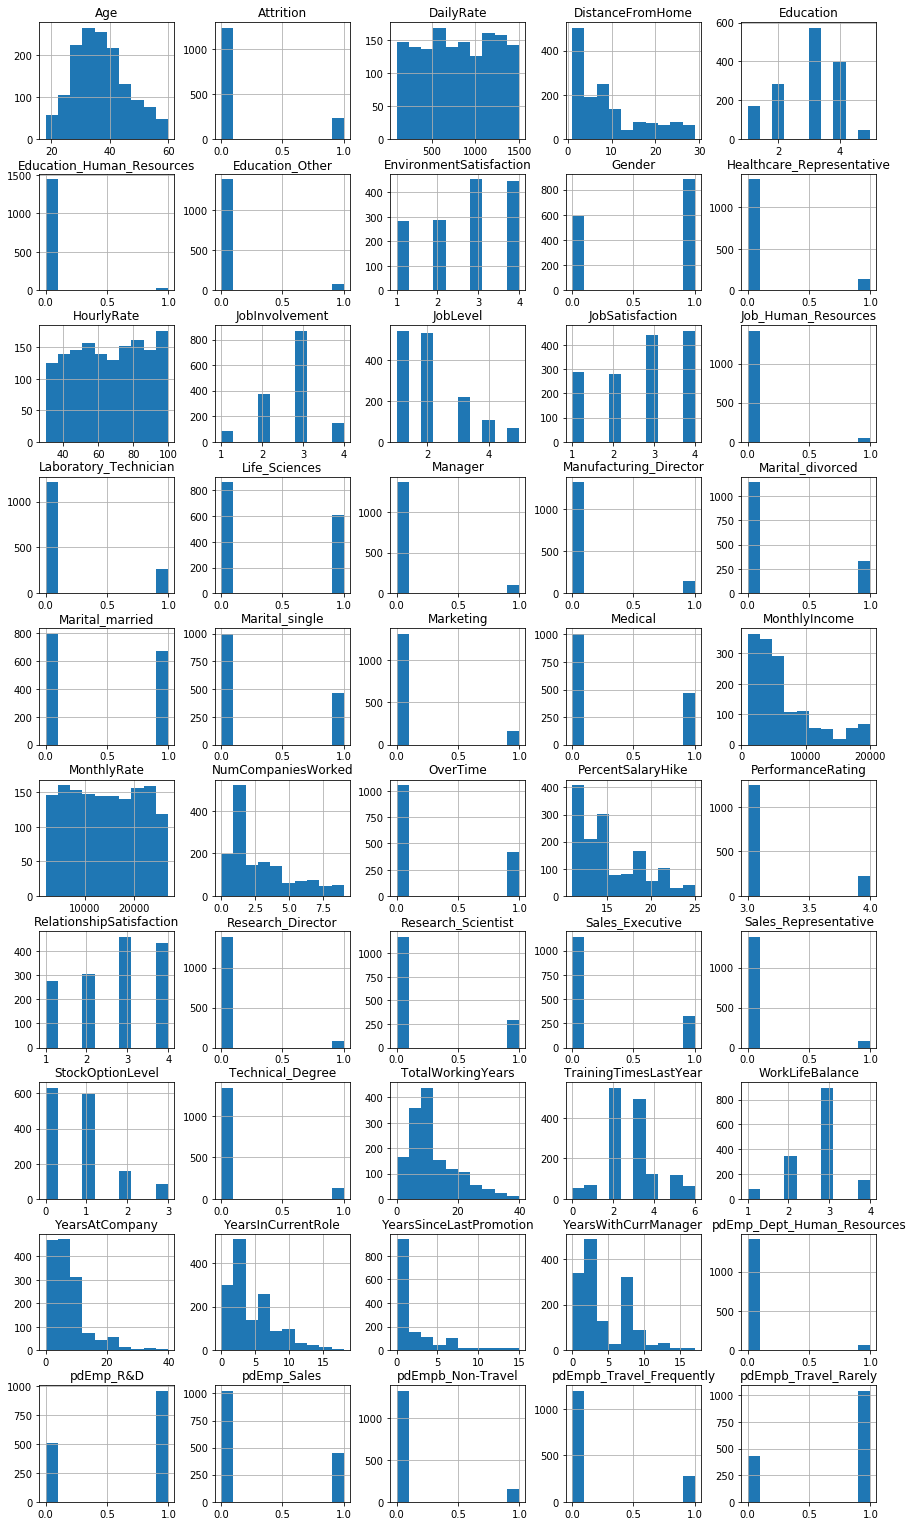

In [19]:
# checking the histogram for each variable.
# %matplotlib inline
pdEmp.hist(bins=10,figsize=(15,30), layout=(11,5))

Random Under-sampling
1    237
0    237
Name: Attrition, dtype: int64
Random over-sampling:
1    1233
0    1233
Name: Attrition, dtype: int64


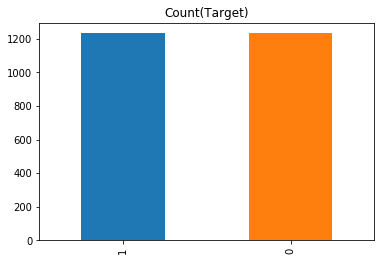

In [20]:
# Resampling the data as data is not evenly distributed.
count_class_1, count_class_2 = pdEmp['Attrition'].value_counts()
# Divide by class
pdEmp_class_1 = pdEmp[pdEmp['Attrition'] == 0]
pdEmp_class_2 = pdEmp[pdEmp['Attrition'] == 1]
pdEmp_class_2.describe()

# Random under-smapling
pdEmp_class_1_under = pdEmp_class_1.sample(count_class_2)
pdEmp_class_1_under_data = pd.concat([pdEmp_class_1_under, pdEmp_class_2],axis=0)
print("Random Under-sampling")
print(pdEmp_class_1_under_data.Attrition.value_counts())




# Random over-sampling
pdEmp_class_2_over = pdEmp_class_2.sample(count_class_1, replace=True)
pdEmp_class_2_over_data = pd.concat([pdEmp_class_1, pdEmp_class_2_over], axis=0)

print('Random over-sampling:')
print(pdEmp_class_2_over_data.Attrition.value_counts())

pdEmp_class_2_over_data.Attrition.value_counts().plot(kind='bar', title='Count(Target)')

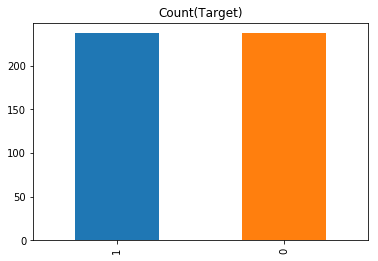

In [21]:
pdEmp_class_1_under_data.Attrition.value_counts().plot(kind='bar', title='Count(Target)')

In [22]:
# Now checking co-relation matrix to reduce the data.
pdEmp_class_1_under_data.corr()



,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Sales_Executive,Manufacturing_Director,Healthcare_Representative,Sales_Representative,Research_Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
Age,1.000000,0.041487,-0.002574,0.196876,0.057980,-0.019915,0.008415,0.025042,0.524478,0.048423,...,0.080853,0.085492,0.057631,-0.199529,0.181404,0.304819,-0.001110,-0.190944,0.147357,0.053314
DailyRate,0.041487,1.000000,-0.006996,0.013450,0.019315,-0.007160,0.021639,0.019671,0.003752,0.006234,...,-0.008609,-0.001150,-0.006319,0.040615,0.003967,0.027537,-0.039290,-0.101135,0.114640,-0.018931
DistanceFromHome,-0.002574,-0.006996,1.000000,0.039976,-0.038636,-0.038071,-0.034935,-0.024742,0.039303,-0.006054,...,0.048760,-0.011925,0.100390,-0.031044,-0.003150,-0.028546,-0.013151,-0.033163,0.047072,-0.018429
Education,0.196876,0.013450,0.039976,1.000000,-0.079185,0.012665,0.053825,0.058995,0.124925,0.020170,...,0.104500,0.021202,-0.063087,-0.131188,0.024619,0.050097,0.019121,-0.069068,0.045865,0.028871
EnvironmentSatisfaction,0.057980,0.019315,-0.038636,-0.079185,1.000000,0.023476,0.018293,0.034879,0.051730,0.040576,...,-0.037714,0.084205,0.024713,0.045438,0.009278,0.037309,-0.025265,0.003931,0.032040,-0.046309
Gender,-0.019915,-0.007160,-0.038071,0.012665,0.023476,1.000000,0.025226,0.000170,-0.083719,0.009851,...,0.006820,-0.110175,0.000401,-0.044354,-0.093540,-0.058582,0.008274,-0.049691,0.009967,0.050459
HourlyRate,0.008415,0.021639,-0.034935,0.053825,0.018293,0.025226,1.000000,0.065000,-0.031773,-0.064784,...,-0.066431,-0.001235,0.043564,-0.002523,-0.015173,0.011161,-0.005334,0.010607,0.048009,-0.075401
JobInvolvement,0.025042,0.019671,-0.024742,0.058995,0.034879,0.000170,0.065000,1.000000,-0.015654,-0.015695,...,-0.000409,0.001530,0.012011,-0.003268,-0.061649,0.033857,0.003469,-0.032966,0.061237,-0.036938
JobLevel,0.524478,0.003752,0.039303,0.124925,0.051730,-0.083719,-0.031773,-0.015654,1.000000,0.068657,...,0.251288,0.149489,0.133472,-0.261221,0.411291,0.540018,-0.106408,-0.118660,0.089151,0.036253
JobSatisfaction,0.048423,0.006234,-0.006054,0.020170,0.040576,0.009851,-0.064784,-0.015695,0.068657,1.000000,...,0.008463,-0.015403,0.006448,-0.004677,0.071240,0.037358,-0.070504,-0.031996,-0.006995,0.049782


In [23]:
pdEmp_class_2_over_data.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Sales_Executive,Manufacturing_Director,Healthcare_Representative,Sales_Representative,Research_Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
Age,1.000000,0.009556,0.014288,0.199949,0.027551,0.008354,0.078948,0.071392,0.511788,0.009576,...,0.065984,0.081617,0.124487,-0.214526,0.179200,0.270689,-0.057215,-0.188428,0.126902,0.076668
DailyRate,0.009556,1.000000,-0.048099,-0.010465,0.014412,0.028552,0.060186,0.062503,0.019700,0.040863,...,0.015490,-0.000589,0.010251,-0.024761,0.018330,0.006139,-0.019493,-0.061806,0.045590,0.020142
DistanceFromHome,0.014288,-0.048099,1.000000,0.027183,0.010199,0.001072,0.031200,0.038431,0.023182,-0.032528,...,0.045386,-0.013764,0.079711,-0.071556,-0.023882,-0.011655,0.028136,-0.034623,0.047875,-0.016916
Education,0.199949,-0.010465,0.027183,1.000000,-0.019312,0.001556,0.038676,0.078462,0.101636,-0.026443,...,0.079395,0.064143,-0.030703,-0.137911,0.043867,0.009941,0.023102,-0.029421,0.013636,0.019770
EnvironmentSatisfaction,0.027551,0.014412,0.010199,-0.019312,1.000000,0.033191,-0.029837,0.064097,0.009501,0.046030,...,-0.028470,0.085986,0.010827,0.021314,-0.010792,0.004059,-0.019147,-0.026199,0.024867,0.001541
Gender,0.008354,0.028552,0.001072,0.001556,0.033191,1.000000,0.014146,0.022655,-0.026356,0.034438,...,0.018826,-0.073103,-0.028046,-0.091351,-0.014987,-0.015164,0.006747,-0.031458,0.001779,0.037301
HourlyRate,0.078948,0.060186,0.031200,0.038676,-0.029837,0.014146,1.000000,0.052520,0.004714,-0.096587,...,-0.026055,0.011281,0.035666,-0.022489,-0.037191,0.028848,-0.024221,0.016606,0.011182,-0.034993
JobInvolvement,0.071392,0.062503,0.038431,0.078462,0.064097,0.022655,0.052520,1.000000,0.045605,-0.019586,...,0.013043,0.023292,0.020462,-0.082543,0.036235,0.022751,0.010545,-0.052384,0.040090,0.015240
JobLevel,0.511788,0.019700,0.023182,0.101636,0.009501,-0.026356,0.004714,0.045605,1.000000,0.041016,...,0.245355,0.162314,0.164179,-0.248655,0.398109,0.508835,-0.102336,-0.128373,0.111436,0.020698
JobSatisfaction,0.009576,0.040863,-0.032528,-0.026443,0.046030,0.034438,-0.096587,-0.019586,0.041016,1.000000,...,0.017806,0.005795,0.031008,0.015740,0.011648,0.002725,-0.056899,-0.032292,0.031886,0.000339


In [24]:
pdEmp.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Sales_Executive,Manufacturing_Director,Healthcare_Representative,Sales_Representative,Research_Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.004892,...,-0.002001,0.049726,0.098825,-0.175785,0.185891,0.294248,-0.029856,-0.119185,0.083919,0.033120
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,0.002966,0.030571,...,-0.000513,-0.005302,0.040141,0.005375,-0.000021,-0.013224,-0.021156,-0.075835,0.040035,0.037080
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.003669,...,0.030761,0.011848,0.022916,-0.015994,-0.022351,-0.039190,-0.024089,-0.027445,0.030232,-0.005440
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,0.101589,-0.011296,...,0.053398,-0.005290,0.024270,-0.091465,0.049694,0.028453,-0.005295,0.004168,-0.001865,-0.002439
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.006784,...,-0.024421,0.059178,0.014090,0.002949,-0.048689,0.010730,-0.022014,0.009035,-0.022180,0.016439
Gender,-0.036311,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,-0.039403,0.033252,...,-0.005348,-0.065197,0.006823,-0.028877,-0.006121,-0.033880,0.036082,-0.032752,-0.007804,0.046076
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.027853,-0.071335,...,-0.011886,-0.014394,0.014599,-0.018703,-0.025128,0.012659,-0.016189,-0.033436,0.036432,-0.006150
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,-0.012630,-0.021476,...,-0.011413,-0.021939,0.001272,-0.027282,0.015200,0.017112,-0.004952,-0.045253,0.028324,0.016815
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.039403,-0.027853,-0.012630,1.000000,-0.001944,...,0.127490,0.114896,0.115704,-0.216559,0.414319,0.552744,-0.100922,-0.087072,0.050547,0.037087
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,0.033252,-0.071335,-0.021476,-0.001944,1.000000,...,0.012604,-0.013747,0.016367,0.001413,-0.006217,-0.005620,-0.029681,0.024571,-0.010315,-0.015197


In [25]:
pdEmp.corr().loc['Attrition']
# though we have seen the correlation and 

Age                          -0.159205
DailyRate                    -0.056652
DistanceFromHome              0.077924
Education                    -0.031373
EnvironmentSatisfaction      -0.103369
Gender                        0.029453
HourlyRate                   -0.006846
JobInvolvement               -0.130016
JobLevel                     -0.169105
JobSatisfaction              -0.103481
MonthlyIncome                -0.159840
MonthlyRate                   0.015170
NumCompaniesWorked            0.043494
OverTime                      0.246118
PercentSalaryHike            -0.013478
PerformanceRating             0.002889
RelationshipSatisfaction     -0.045872
StockOptionLevel             -0.137145
TotalWorkingYears            -0.171063
TrainingTimesLastYear        -0.059478
WorkLifeBalance              -0.063939
YearsAtCompany               -0.134392
YearsInCurrentRole           -0.160545
YearsSinceLastPromotion      -0.033019
YearsWithCurrManager         -0.156199
Attrition                

In [26]:
# As we can see there few variable which has the positive relation with target class.
# for now we will be working with all variables
# converting explored data in data frames.
emp_under = spark.createDataFrame(pdEmp_class_1_under_data)
emp_over = spark.createDataFrame(pdEmp_class_2_over_data)
emp_normal = spark.createDataFrame(pdEmp)

In [27]:
col_names = emp_normal.schema.names
col_names.remove("Attrition")
print(*col_names, sep = ", ")

Age, DailyRate, DistanceFromHome, Education, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, pdEmpb_Travel_Rarely, pdEmpb_Travel_Frequently, pdEmpb_Non-Travel, Life_Sciences, Medical, Marketing, Technical_Degree, Education_Human_Resources, Education_Other, pdEmp_Sales, pdEmp_R&D, pdEmp_Dept_Human_Resources, Research_Scientist, Laboratory_Technician, Sales_Executive, Manufacturing_Director, Healthcare_Representative, Sales_Representative, Research_Director, Manager, Job_Human_Resources, Marital_single, Marital_married, Marital_divorced


In [28]:
# Preparing data for machine learning. We need only two columns only - features and label
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import numpy as np

In [29]:
vassembler = VectorAssembler(inputCols=col_names, outputCol="features")
vassembler_emp_under = vassembler.transform(emp_under)
vassembler_emp_over = vassembler.transform(emp_over)
vassembler_emp_normal = vassembler.transform(emp_normal)

vassembler_emp_under = vassembler_emp_under.select(['features', 'Attrition'])
vassembler_emp_over = vassembler_emp_over.select(['features', 'Attrition'])
vassembler_emp_normal = vassembler_emp_normal.select(['features', 'Attrition'])
vassembler_emp_under.show(3)
vassembler_emp_over.show(3)
vassembler_emp_normal.show(3)

+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(49,[0,1,2,3,4,6,...|        0|
|(49,[0,1,2,3,4,5,...|        0|
|(49,[0,1,2,3,4,5,...|        0|
+--------------------+---------+
only showing top 3 rows

+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(49,[0,1,2,3,4,5,...|        0|
|(49,[0,1,2,3,4,6,...|        0|
|(49,[0,1,2,3,4,5,...|        0|
+--------------------+---------+
only showing top 3 rows

+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(49,[0,1,2,3,4,6,...|        1|
|(49,[0,1,2,3,4,5,...|        0|
|(49,[0,1,2,3,4,5,...|        1|
+--------------------+---------+
only showing top 3 rows



In [30]:
def linear_regression(data, splitfrac = [0.7,0.3]):
    train_data,test_data = data.randomSplit(splitfrac)
    # Let's see our training data.
    train_data.describe().show()

    # And our testing data.
    test_data.describe().show()

    lr = LinearRegression(featuresCol='features', labelCol='Attrition')
    
    # Fit the training data.
    lr_model = lr.fit(train_data)

    # Print the coefficients.
    #print("Coefficients: " + str(lr_model.coefficients))

    # Print the intercept.
    #print("Intercept: " + str(lr_model.intercept) + "\n")

    # Summarise the model and print out some evaluation metrics.
    training_summary = lr_model.summary
    print ("\n Training Results")
    # Print RMSE. 
    print("RMSE on training data: " + str(training_summary.rootMeanSquaredError))

    # Print R2.
    print("R2: " + str(training_summary.r2))

    # Let's evaluate the model against the test data.
    test_results = lr_model.evaluate(test_data)

    # And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
    print ("\n Test Results")
    print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
    print("R2 on test data: " + str(test_results.r2))

In [31]:
linear_regression(vassembler_emp_under, splitfrac = [0.7,0.3])
linear_regression(vassembler_emp_over, splitfrac = [0.6,0.4])
linear_regression(vassembler_emp_normal, splitfrac = [0.6,0.4])

+-------+------------------+
|summary|         Attrition|
+-------+------------------+
|  count|               323|
|   mean|0.5015479876160991|
| stddev|0.5007733956671915|
|    min|                 0|
|    max|                 1|
+-------+------------------+

+-------+------------------+
|summary|         Attrition|
+-------+------------------+
|  count|               151|
|   mean|0.4966887417218543|
| stddev|0.5016528970703478|
|    min|                 0|
|    max|                 1|
+-------+------------------+


 Training Results
RMSE on training data: 0.3776963080202607
R2: 0.42937652616971766

 Test Results
RMSE on test data: 0.45742869953495324
R2 on test data: 0.16299923041701814
+-------+------------------+
|summary|         Attrition|
+-------+------------------+
|  count|              1495|
|   mean|0.5083612040133779|
| stddev|0.5000973700035755|
|    min|                 0|
|    max|                 1|
+-------+------------------+

+-------+-------------------+
|summary

In [32]:
def binomial_logistic_regression(data, splitfrac = [0.7,0.3], beta_coffecient = False, roc= False, precision_recall= False):
    # Split our data. Note that the new DataFrame is being used.
    #print('\n'.join(map(str, splitfrac))) 
    train_data, test_data = data.randomSplit(splitfrac)
    print("Training Dataset Count: " + str(train_data.count()))
    print("Test Dataset Count: " + str(test_data.count()))

    # Instantiate the model.
    lr_model = LogisticRegression(featuresCol='features',labelCol='Attrition')

    # Fit the model.
    lr_model = lr_model.fit(train_data)
    training_summary = lr_model.summary
    # And evaluate the model using the test data.
    results = lr_model.transform(test_data)
    if beta_coffecient:
        # Visualising the coefficients. Sort from lowest to highest.
        beta = np.sort(lr_model.coefficients)
        # Plot the data.
        plt.plot(beta)
        # Add a label to the data.
        plt.ylabel('Beta Coefficients')
        # Show the graph. 
        plt.show()
        
    if roc :
        # Convert DataFrame to Pandas DataFrame.
        # Convert the DataFrame to a Pandas DataFrame.
        ROC = training_summary.roc.toPandas()

        # Plot the true positive and false positive rates.
        plt.plot(ROC['FPR'],ROC['TPR'])

        # Define the labels.
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.title('ROC Curve')
        plt.show()

        # Print the AUC statistic. 
        print('Area Under the Curve: ' + str(training_summary.areaUnderROC))
    if precision_recall:
        # Convert DataFrame to Pandas DataFrame.
        pr = training_summary.pr.toPandas()
        # Plot model recall and precision.
        plt.plot(pr['recall'],pr['precision'])
        # Define the labels and show the graph. 
        plt.ylabel('Precision')
        plt.xlabel('Recall')
        plt.show()

Training Dataset Count: 281
Test Dataset Count: 193


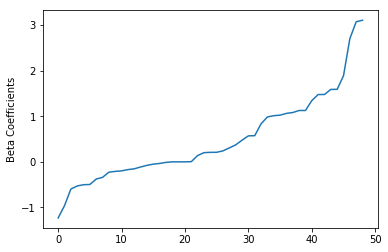

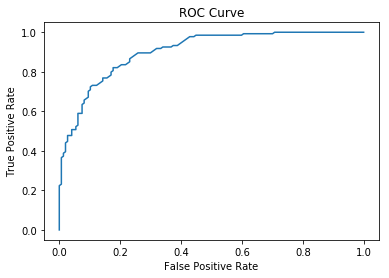

Area Under the Curve: 0.9036450401055943


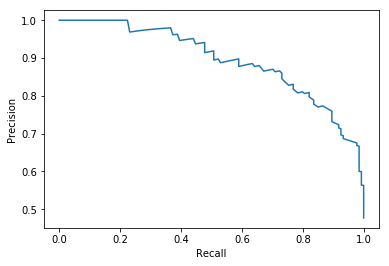

Training Dataset Count: 1488
Test Dataset Count: 978


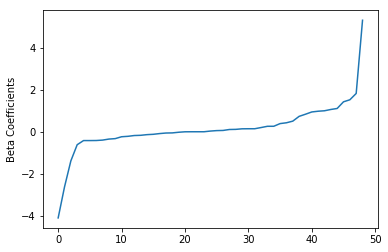

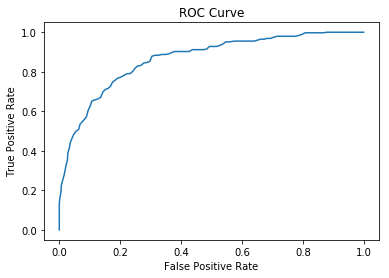

Area Under the Curve: 0.8649629629629628


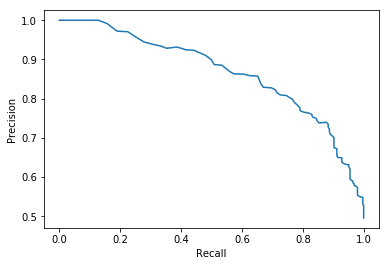

Training Dataset Count: 927
Test Dataset Count: 543


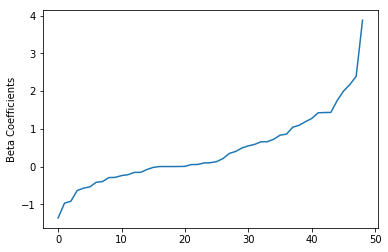

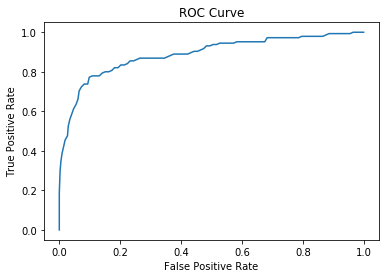

Area Under the Curve: 0.8883675809154246


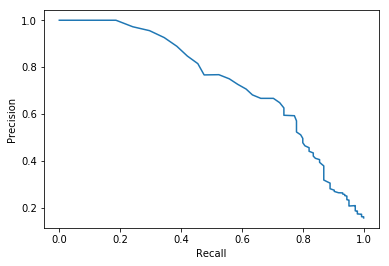

In [33]:
binomial_logistic_regression(vassembler_emp_under, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)
binomial_logistic_regression(vassembler_emp_over, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)
binomial_logistic_regression(vassembler_emp_normal, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)


In [35]:
vassembler = VectorAssembler(inputCols=["MonthlyRate", "NumCompaniesWorked", "OverTime", "PerformanceRating", "pdEmpb_Travel_Frequently", "Marketing", "Technical_Degree", "Education_Human_Resources", "pdEmp_Sales", "pdEmp_Dept_Human_Resources", "Laboratory_Technician", "Sales_Executive", "Sales_Representative", "Job_Human_Resources", "Marital_single"], outputCol="features")
vemp_normal_corr_columns = vassembler.transform(emp_normal)
vemp_normal_corr_columns = vemp_normal_corr_columns.select(['features', 'Attrition'])
vemp_normal_corr_columns.show(3)


+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(15,[0,1,2,3,8,11...|        1|
|(15,[0,1,3,4],[24...|        0|
|(15,[0,1,2,3,10,1...|        1|
+--------------------+---------+
only showing top 3 rows



Training Dataset Count: 898
Test Dataset Count: 572


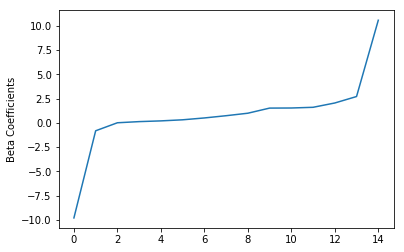

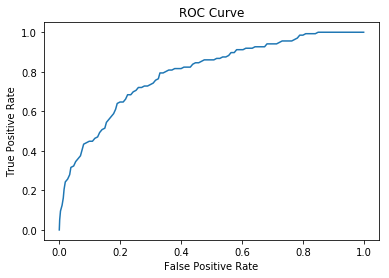

Area Under the Curve: 0.7945036282229428


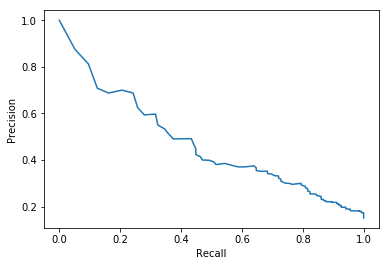

In [36]:
binomial_logistic_regression(vemp_normal_corr_columns, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)

In [37]:
linear_regression(vemp_normal_corr_columns, splitfrac = [0.7,0.3])

+-------+-------------------+
|summary|          Attrition|
+-------+-------------------+
|  count|               1022|
|   mean|0.14285714285714285|
| stddev| 0.3500984290627155|
|    min|                  0|
|    max|                  1|
+-------+-------------------+

+-------+------------------+
|summary|         Attrition|
+-------+------------------+
|  count|               448|
|   mean|          0.203125|
| stddev|0.4027745634884217|
|    min|                 0|
|    max|                 1|
+-------+------------------+


 Training Results
RMSE on training data: 0.31551421590609086
R2: 0.18701469974951157

 Test Results
RMSE on test data: 0.38399465747236383
R2 on test data: 0.08904529415062645


+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(15,[0,1,3,8,11,1...|        0|
|(15,[0,2,3],[5586...|        0|
|(15,[0,1,2,3,10],...|        0|
+--------------------+---------+
only showing top 3 rows

Training Dataset Count: 259
Test Dataset Count: 215


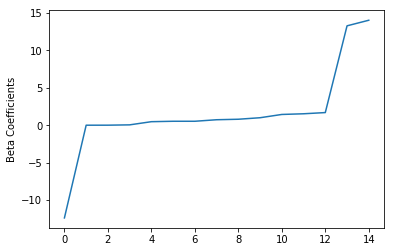

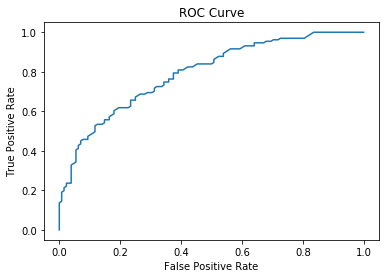

Area Under the Curve: 0.792551288167939


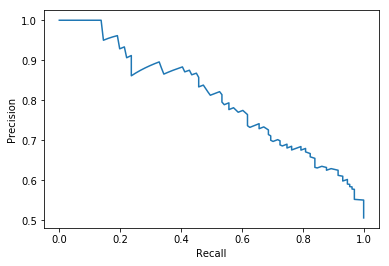

+-------+------------------+
|summary|         Attrition|
+-------+------------------+
|  count|               322|
|   mean|0.5031055900621118|
| stddev|0.5007685507936586|
|    min|                 0|
|    max|                 1|
+-------+------------------+

+-------+------------------+
|summary|         Attrition|
+-------+------------------+
|  count|               152|
|   mean|0.4934210526315789|
| stddev|0.5016094695589416|
|    min|                 0|
|    max|                 1|
+-------+------------------+


 Training Results
RMSE on training data: 0.4184160475147077
R2: 0.29968502744645464

 Test Results
RMSE on test data: 0.47272218939722127
R2 on test data: 0.10598014477509987


In [38]:
vassembler = VectorAssembler(inputCols=["MonthlyRate", "NumCompaniesWorked", "OverTime", "PerformanceRating", "pdEmpb_Travel_Frequently", "Marketing", "Technical_Degree", "Education_Human_Resources", "pdEmp_Sales", "pdEmp_Dept_Human_Resources", "Laboratory_Technician", "Sales_Executive", "Sales_Representative", "Job_Human_Resources", "Marital_single"], outputCol="features")
vemp_normal_corr_columns_under = vassembler.transform(emp_under)
vemp_normal_corr_columns_under = vemp_normal_corr_columns_under.select(['features', 'Attrition'])
vemp_normal_corr_columns_under.show(3)

binomial_logistic_regression(vemp_normal_corr_columns_under, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)
linear_regression(vemp_normal_corr_columns_under, splitfrac = [0.7,0.3])

In [ ]:
vassembler = VectorAssembler(inputCols=["MonthlyRate", "NumCompaniesWorked", "OverTime", "PerformanceRating", "pdEmpb_Travel_Frequently", "Marketing", "Technical_Degree", "Education_Human_Resources", "pdEmp_Sales", "pdEmp_Dept_Human_Resources", "Laboratory_Technician", "Sales_Executive", "Sales_Representative", "Job_Human_Resources", "Marital_single"], outputCol="features")
vemp_normal_corr_columns_over = vassembler.transform(emp_over)
vemp_normal_corr_columns_over = vemp_normal_corr_columns_over.select(['features', 'Attrition'])
vemp_normal_corr_columns_over.show(3)

binomial_logistic_regression(vemp_normal_corr_columns_over, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)
linear_regression(vemp_normal_corr_columns_over, splitfrac = [0.7,0.3])

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric

In [ ]:
assembler_features  = VectorAssembler(inputCols=["MonthlyRate", "NumCompaniesWorked", "OverTime", "PerformanceRating", "pdEmpb_Travel_Frequently", "Marketing", "Technical_Degree", "Education_Human_Resources", "pdEmp_Sales", "pdEmp_Dept_Human_Resources", "Laboratory_Technician", "Sales_Executive", "Sales_Representative", "Job_Human_Resources", "Marital_single"], outputCol="features")
labelIndexer = StringIndexer(inputCol='Attrition', outputCol="label")
tmp = [assembler_features, labelIndexer]
pipeline = Pipeline(stages=tmp)
allData = pipeline.fit(emp_over).transform(emp_over)
allData.cache()
trainingData, testData = allData.randomSplit([0.8,0.2], seed=0) # need to ensure same split for each time
print("Distribution of Pos and Neg in trainingData is: ", trainingData.groupBy("Attrition").count().take(3))

In [ ]:
rf = RandomForestClassifier(labelCol='label', featuresCol='features',numTrees=200)
fit = rf.fit(trainingData)
transformed = fit.transform(testData)

In [ ]:
training

results = transformed.select(['probability', 'label'])
## prepare score-label set
# Convert DataFrame to Pandas DataFrame.
# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()


Training Dataset Count: 1180
Test Dataset Count: 290


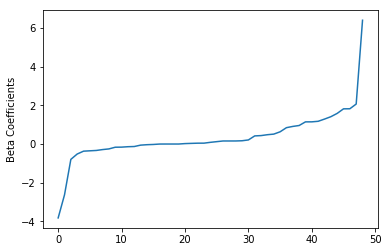

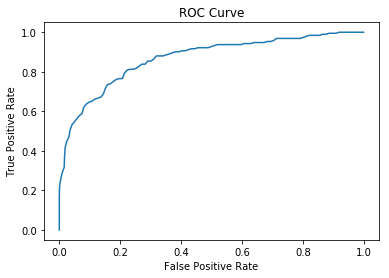

Area Under the Curve: 0.8672454875168687


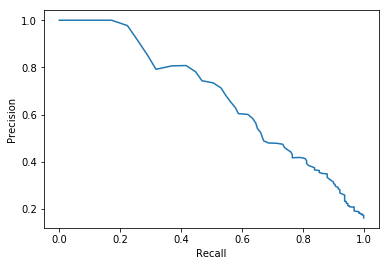

Training Dataset Count: 875
Test Dataset Count: 595


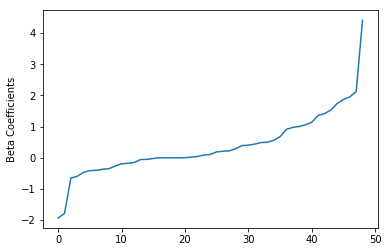

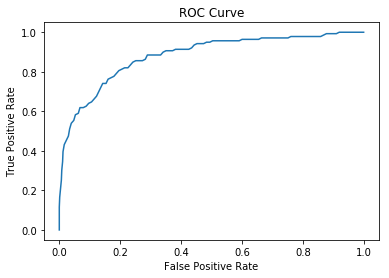

Area Under the Curve: 0.8815344463559586


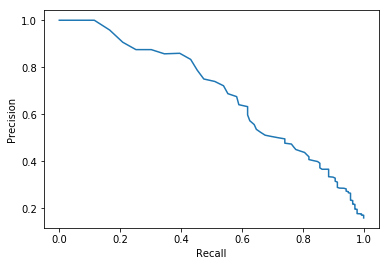

Training Dataset Count: 1027
Test Dataset Count: 443


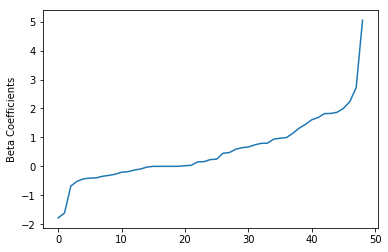

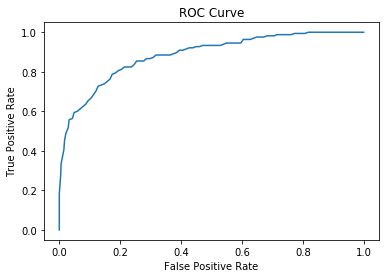

Area Under the Curve: 0.8844653026787596


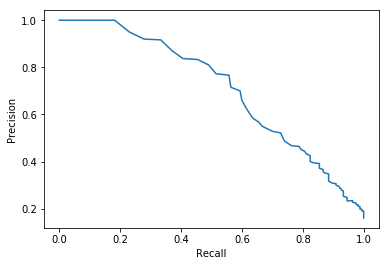

In [42]:
binomial_logistic_regression(vassembler_emp_normal, splitfrac = [0.8,0.2], beta_coffecient = True, roc= True, precision_recall= True)
binomial_logistic_regression(vassembler_emp_normal, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)
binomial_logistic_regression(vassembler_emp_normal, splitfrac = [0.7,0.3], beta_coffecient = True, roc= True, precision_recall= True)